In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### Importación de datos y limpieza

In [2]:
df = pd.read_excel(r'nuclear-energy-generation.xlsx', sheet_name = 0)
df_backup = df.copy()

values = ['World']
df = df[df.Entity.isin(values) == False]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2051
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                2052 non-null   object 
 1   Code                  2052 non-null   object 
 2   Year                  2052 non-null   int64  
 3   Nuclear_Electricity   2052 non-null   float64
 4   Annual_CO2_emissions  2052 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 96.2+ KB


,Entity,Code,Year,Nuclear_Electricity,Annual_CO2_emissions
0,Argentina,ARG,1965,0.0,2.666444
1,Argentina,ARG,1966,0.0,2.815352
2,Argentina,ARG,1967,0.0,2.877178
3,Argentina,ARG,1968,0.0,2.985735
4,Argentina,ARG,1969,0.0,3.291103


In [3]:
df2 = pd.read_excel(r'countryContinent.xlsx', sheet_name=0)
df_join = pd.merge(df, df2, how='inner', left_on='Code', right_on='code_3')

In [4]:
df_join = df_join.drop(['country', 'code_2', 'code_3', 'country_code', 'iso_3166_2', 'region_code', 'sub_region_code'], axis='columns')
df_join.head()

,Entity,Code,Year,Nuclear_Electricity,Annual_CO2_emissions,continent,sub_region
0,Argentina,ARG,1965,0.0,2.666444,Americas,South America
1,Argentina,ARG,1966,0.0,2.815352,Americas,South America
2,Argentina,ARG,1967,0.0,2.877178,Americas,South America
3,Argentina,ARG,1968,0.0,2.985735,Americas,South America
4,Argentina,ARG,1969,0.0,3.291103,Americas,South America


In [5]:
df3 = pd.read_csv(r'population-and-demography.csv')
df3 = df3.rename(columns={'Country':'Entity'})
df3.head()

,Entity,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


In [6]:
df_join = pd.merge(df_join, df3, how='left', on=['Entity', 'Year'])

In [7]:
nominales = ['Entity', 'Code', 'continent', 'sub_region']
intervalo = ['Year']
razon = ['Nuclear_Electricity', 'Annual_CO2_emissions', 'Population']

In [8]:
for i in nominales:
    df_join[i] = df_join[i].astype('category')
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2051
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Entity                2052 non-null   category
 1   Code                  2052 non-null   category
 2   Year                  2052 non-null   int64   
 3   Nuclear_Electricity   2052 non-null   float64 
 4   Annual_CO2_emissions  2052 non-null   float64 
 5   continent             2052 non-null   category
 6   sub_region            2052 non-null   category
 7   Population            2052 non-null   int64   
dtypes: category(4), float64(2), int64(2)
memory usage: 91.4 KB


In [9]:
df_join['Nuclear_PerCapita'] = df_join['Nuclear_Electricity']/df_join['Population']
df_join['CO2_PerCapita'] = df_join['Annual_CO2_emissions']/df_join['Population']
df_join

,Entity,Code,Year,Nuclear_Electricity,Annual_CO2_emissions,continent,sub_region,Population,Nuclear_PerCapita,CO2_PerCapita
0,Argentina,ARG,1965,0.00,2.666444,Americas,South America,22053662,0.000000,1.209071e-07
1,Argentina,ARG,1966,0.00,2.815352,Americas,South America,22403120,0.000000,1.256679e-07
2,Argentina,ARG,1967,0.00,2.877178,Americas,South America,22757014,0.000000,1.264304e-07
3,Argentina,ARG,1968,0.00,2.985735,Americas,South America,23112976,0.000000,1.291800e-07
4,Argentina,ARG,1969,0.00,3.291103,Americas,South America,23472030,0.000000,1.402138e-07
...,...,...,...,...,...,...,...,...,...,...
2047,United States,USA,2017,804.95,15.800776,Americas,Northern America,329791230,0.000002,4.791145e-08
2048,United States,USA,2018,807.08,16.187923,Americas,Northern America,332140030,0.000002,4.873825e-08
2049,United States,USA,2019,809.41,15.730885,Americas,Northern America,334319680,0.000002,4.705342e-08
2050,United States,USA,2020,789.88,14.037217,Americas,Northern America,335942000,0.000002,4.178464e-08


### Análisis Bivariado

**Hipótesis nula**

1. Existe una relación entre las emisiones anuales de CO$_{2}$ y la población de los países.
2. Existe una relación entre las emisiones anuales de CO$_{2}$ y generación de energía nuclear de los países.

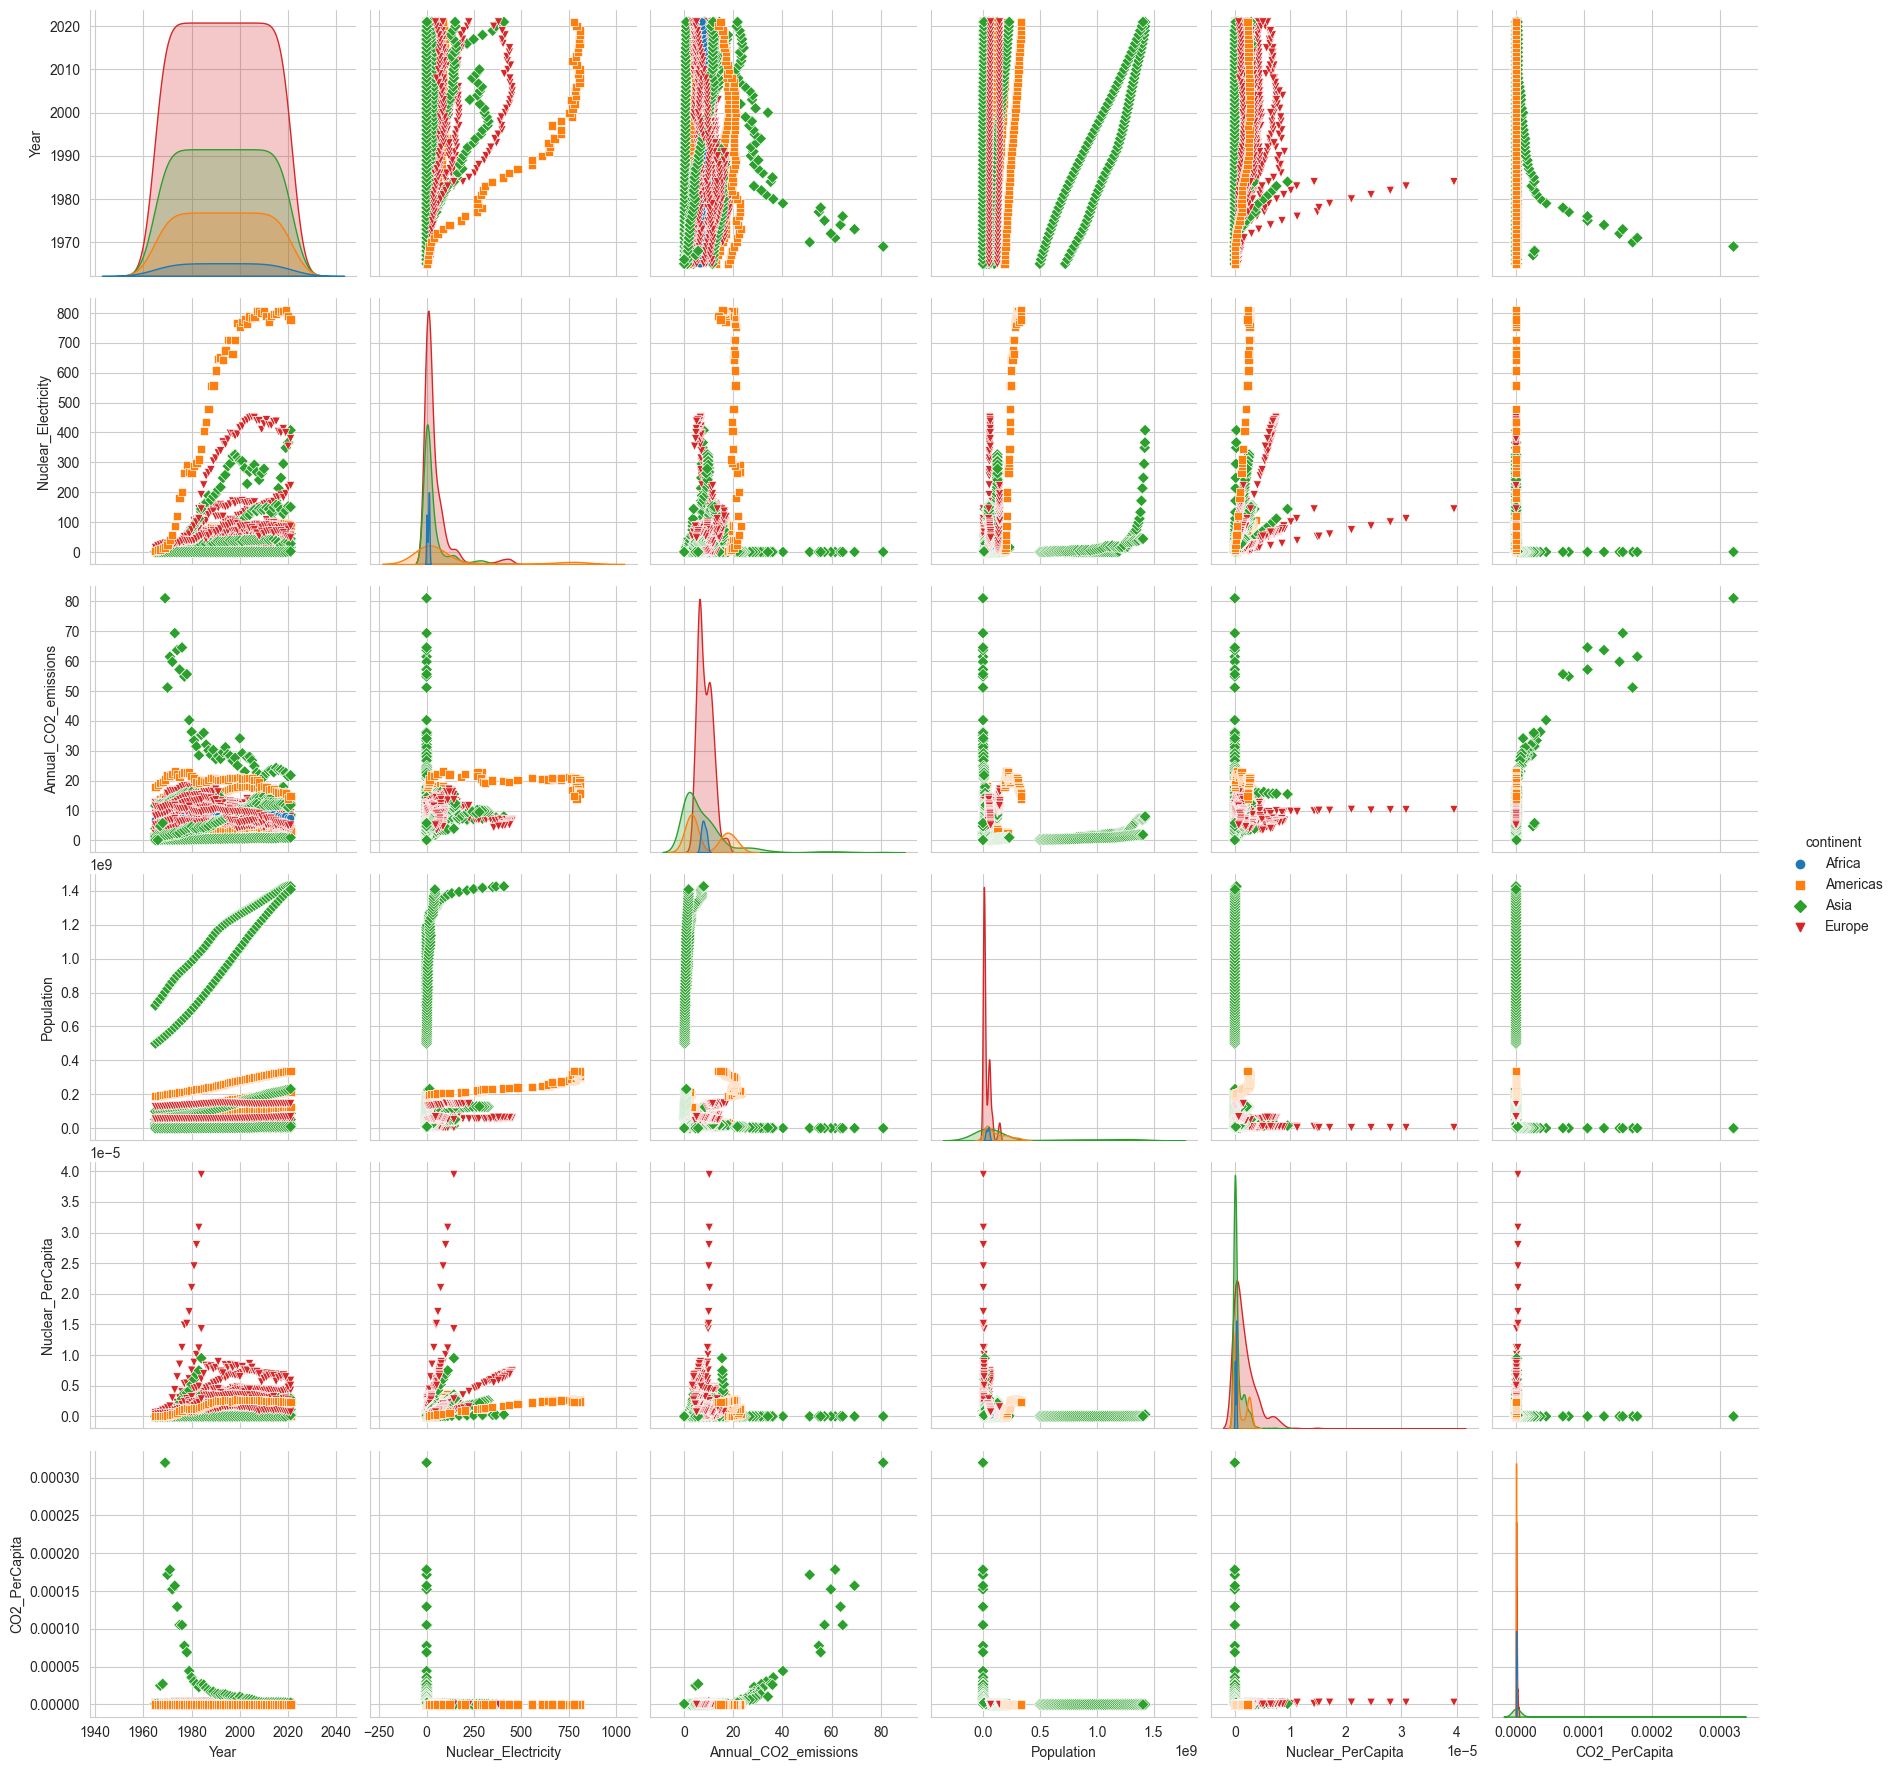

In [10]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data=df_join, hue='continent', height=3, markers=['o', 's', 'D', 'v'])
plt.show()

**Hallazgo**

- Se observa que al tener un set de datos longitudinales de panel, el estudio de el conjunto completo es complicado, por lo que un estudio longitudinal (países separados) es una ruta más adecuada.
- No se observan relaciones lineales claras entre los datos.

In [11]:
corrSP = df_join[['Nuclear_Electricity','Annual_CO2_emissions','Population','Nuclear_PerCapita','CO2_PerCapita']].corr(method='spearman')

<AxesSubplot: >

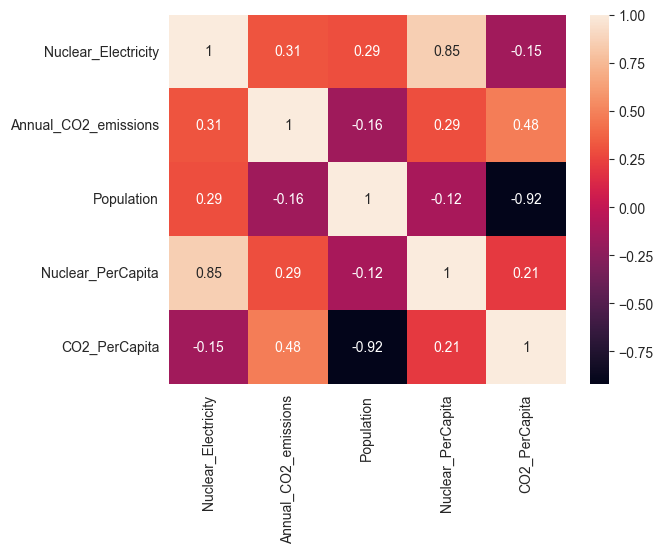

In [12]:
sns.heatmap(corrSP.round(2), annot=True)

**Hallazgos**

- Al realizar una correlación de los datos con el método spearman, se observa correlación negativa muy alta entre la población y el CO$_{2}$ per cápita, lo que da a entender que el crecimiento poblacional y la cantidad de CO$_{2}$ generado crecen en sentidos contrario, siendo lo contrario a lo esperado en la hipótesis nula 1.
- Dicha oposición a la hipótesis nula (1) se confirma con la correlación observada entre la población y las emisiones de CO$_{2}$ anuales.
- De igual forma, los datos de correlación muestran que no existe una alta correlación entre las emisiones de CO$_{2}$ per cápita y la energía nuclear generada per cápita.


In [13]:
dfin = df_join.copy()
dfin = dfin.set_index('Year')
dfin

,Entity,Code,Nuclear_Electricity,Annual_CO2_emissions,continent,sub_region,Population,Nuclear_PerCapita,CO2_PerCapita
Year,,,,,,,,,
1965,Argentina,ARG,0.00,2.666444,Americas,South America,22053662,0.000000,1.209071e-07
1966,Argentina,ARG,0.00,2.815352,Americas,South America,22403120,0.000000,1.256679e-07
1967,Argentina,ARG,0.00,2.877178,Americas,South America,22757014,0.000000,1.264304e-07
1968,Argentina,ARG,0.00,2.985735,Americas,South America,23112976,0.000000,1.291800e-07
1969,Argentina,ARG,0.00,3.291103,Americas,South America,23472030,0.000000,1.402138e-07
...,...,...,...,...,...,...,...,...,...
2017,United States,USA,804.95,15.800776,Americas,Northern America,329791230,0.000002,4.791145e-08
2018,United States,USA,807.08,16.187923,Americas,Northern America,332140030,0.000002,4.873825e-08
2019,United States,USA,809.41,15.730885,Americas,Northern America,334319680,0.000002,4.705342e-08


Para un análisis bivariado más comparativo, se seleccionaron un grupo de datos más específicos, tomando en cuenta poblaciones similares a la de México, observando la energía nuclear generada las emisiones anuales de CO$_{2}$.

In [14]:
pop = dfin[dfin.Entity == 'Mexico']
pop.Population.iloc[-1]

126705140

In [15]:
values = dfin.groupby(by='Entity')['Population']

for i in (values.max()):
    i = str(i)
    if len(i)==9 or len(i)>9:
        print(i)
values.max()

214326220
1425893500
1407563900
128117040
126705140
231402110
148897280
336997630


Entity
Argentina                 45276788
Armenia                    3617638
Belarus                   10480485
Belgium                   11611416
Brazil                   214326220
Bulgaria                   8980602
Canada                    38155012
China                   1425893500
Czechia                   10536876
Finland                    5535982
France                    64531450
Germany                   83408560
Hungary                   10698682
India                   1407563900
Iran                      87923430
Italy                     60322790
Japan                    128117040
Kazakhstan                19196468
Lithuania                  3795748
Mexico                   126705140
Netherlands               17501696
Pakistan                 231402110
Romania                   22842488
Russia                   148897280
Slovakia                   5456681
Slovenia                   2119408
South Africa              59392256
South Korea               51844690
Spain        

In [16]:
#Paises con una poblacion similar a Mexico
paises = ['Brazil', 'China', 'India', 'Japan', 'Mexico', 'Pakistan', 'Russia', 'United States']


In [17]:
dfMex = dfin[dfin.Entity == 'Mexico']
dfBra = dfin[dfin.Entity == 'Brazil']
dfChi = dfin[dfin.Entity == 'China']
dfIn = dfin[dfin.Entity == 'India']
dfJap = dfin[dfin.Entity == 'Japan']
dfPak = dfin[dfin.Entity == 'Pakistan']
dfRus = dfin[dfin.Entity == 'Russia']
dfUs = dfin[dfin.Entity == 'United States']

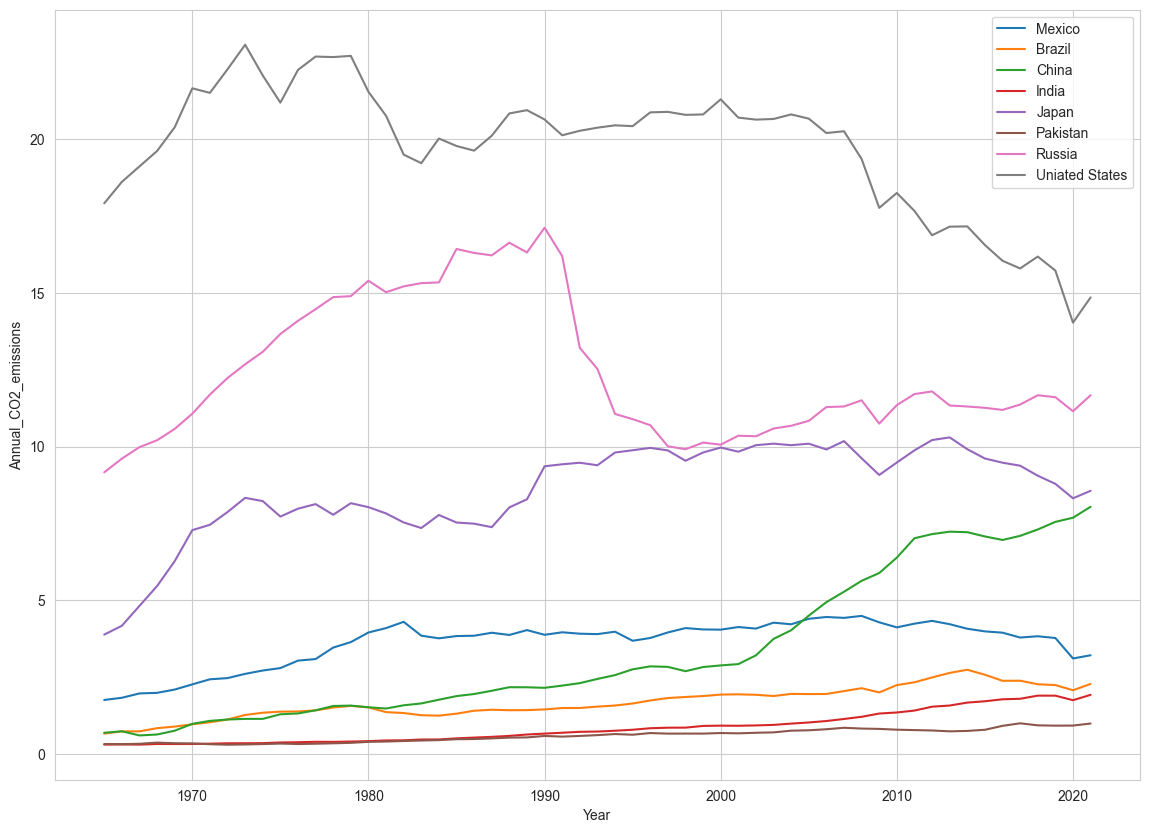

In [18]:
fig,ax = plt.subplots(figsize=(14,10))
ax=sns.lineplot(data=dfMex, x=dfMex.index, y=dfMex.Annual_CO2_emissions, label='Mexico')
ax=sns.lineplot(data=dfBra, x=dfBra.index, y=dfBra.Annual_CO2_emissions, label='Brazil')
ax=sns.lineplot(data=dfChi, x=dfChi.index, y=dfChi.Annual_CO2_emissions, label='China')
ax=sns.lineplot(data=dfIn, x=dfIn.index, y=dfIn.Annual_CO2_emissions, label='India')
ax=sns.lineplot(data=dfJap, x=dfJap.index, y=dfJap.Annual_CO2_emissions, label='Japan')
ax=sns.lineplot(data=dfPak, x=dfPak.index, y=dfPak.Annual_CO2_emissions, label='Pakistan')
ax=sns.lineplot(data=dfRus, x=dfRus.index, y=dfRus.Annual_CO2_emissions, label='Russia')
ax=sns.lineplot(data=dfUs, x=dfUs.index, y=dfUs.Annual_CO2_emissions, label='Uniated States')

**Hallazgos**
- Los países que muestran menores emisiones de CO$_{2}$ son: India, Pakistan, Brazil y México, esto se puede deber a que a pesar de su indistrialización, la mayoría de la población tiende a un estilo de vida de clase media-baja.
- Los países que muestran una mayor emisión de gases de CO$_{2}$ son: Japan, Russia y United States, países donde el estilo de vida tiende a ser de clase media-alta.

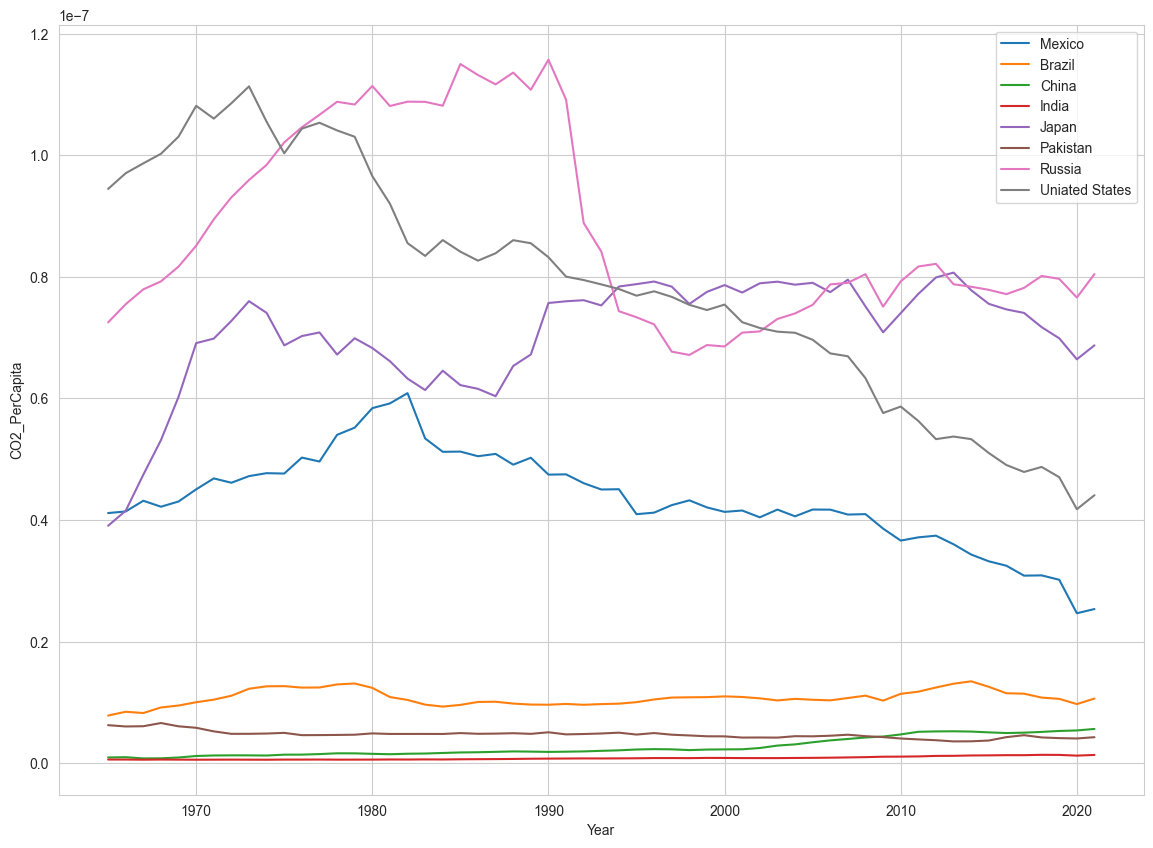

In [19]:
fig,ax = plt.subplots(figsize=(14,10))
ax=sns.lineplot(data=dfMex, x=dfMex.index, y=dfMex.CO2_PerCapita, label='Mexico')
ax=sns.lineplot(data=dfBra, x=dfBra.index, y=dfBra.CO2_PerCapita, label='Brazil')
ax=sns.lineplot(data=dfChi, x=dfChi.index, y=dfChi.CO2_PerCapita, label='China')
ax=sns.lineplot(data=dfIn, x=dfIn.index, y=dfIn.CO2_PerCapita, label='India')
ax=sns.lineplot(data=dfJap, x=dfJap.index, y=dfJap.CO2_PerCapita, label='Japan')
ax=sns.lineplot(data=dfPak, x=dfPak.index, y=dfPak.CO2_PerCapita, label='Pakistan')
ax=sns.lineplot(data=dfRus, x=dfRus.index, y=dfRus.CO2_PerCapita, label='Russia')
ax=sns.lineplot(data=dfUs, x=dfUs.index, y=dfUs.CO2_PerCapita, label='Uniated States')

**Hallazgos**
- Se observa que de manera general para los países observados, la tendencia de la emisión de gases per cápita se mantiene estable, confirmando que no existe una relación con el crecimiento poblacional como se establecia en la hipótesis nula 1.
- La disminusión de los gases emitidos per cápita para United States alrededor de 1990 se puede deber a la recesión que se sufrió durante esa época, así como se puede deber a la estanflación vivida durante 1970.
- Japón sufrión un decrecimiento de las emisiones per cápita alrededor de 1970, puede existir una relación entre la estanflación vivida por United States puesto que este es el principal aliado económico.
- La disminusión de los gases per cápita generados por Rusia se pueden atribuir a la disolución de la unión sóvietica dada en 1991, cercana al inicio de la disminusión de la gráfica.

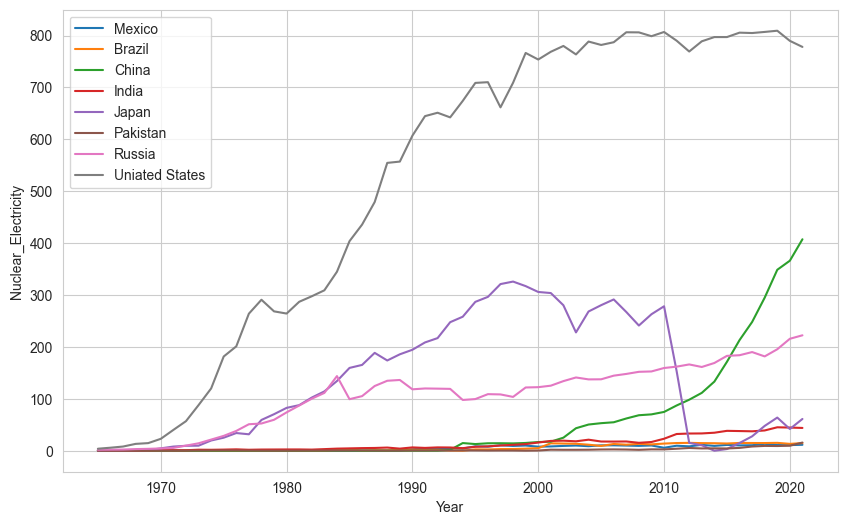

In [20]:
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.lineplot(data=dfMex, x=dfMex.index, y=dfMex.Nuclear_Electricity, label='Mexico')
ax=sns.lineplot(data=dfBra, x=dfBra.index, y=dfBra.Nuclear_Electricity, label='Brazil')
ax=sns.lineplot(data=dfChi, x=dfChi.index, y=dfChi.Nuclear_Electricity, label='China')
ax=sns.lineplot(data=dfIn, x=dfIn.index, y=dfIn.Nuclear_Electricity, label='India')
ax=sns.lineplot(data=dfJap, x=dfJap.index, y=dfJap.Nuclear_Electricity, label='Japan')
ax=sns.lineplot(data=dfPak, x=dfPak.index, y=dfPak.Nuclear_Electricity, label='Pakistan')
ax=sns.lineplot(data=dfRus, x=dfRus.index, y=dfRus.Nuclear_Electricity, label='Russia')
ax=sns.lineplot(data=dfUs, x=dfUs.index, y=dfUs.Nuclear_Electricity, label='Uniated States')

Existe una similitud entre las gráficas de energía nuclear total y energía nuclear per cápita, por lo que el análisis se centrara utilzando los datos de energía nuclear per cápita.

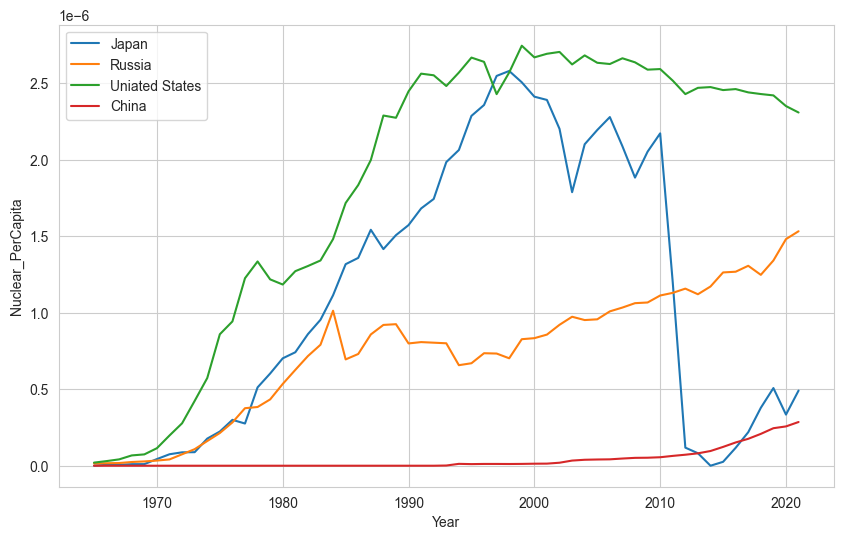

In [21]:
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.lineplot(data=dfJap, x=dfJap.index, y=dfJap.Nuclear_PerCapita, label='Japan')
ax=sns.lineplot(data=dfRus, x=dfRus.index, y=dfRus.Nuclear_PerCapita, label='Russia')
ax=sns.lineplot(data=dfUs, x=dfUs.index, y=dfUs.Nuclear_PerCapita, label='Uniated States')
ax=sns.lineplot(data=dfChi, x=dfChi.index, y=dfChi.Nuclear_PerCapita, label='China')

**Hallazgo**
- De manera general se observa un crecimiento de la generación de energía para los países mostrados en el gráfico, siendo este continua, mostrando pocos valles.
- Se observa una decaída abrupta de la generación de energía nuclear para Japón en el 2010, esto se puede atribuir a el terremoto sufrido que a su vez ocasinó el accidente nuclear de Fukushima, lo que ocasionó un periodo de nula o poca generación de energía nuclear.

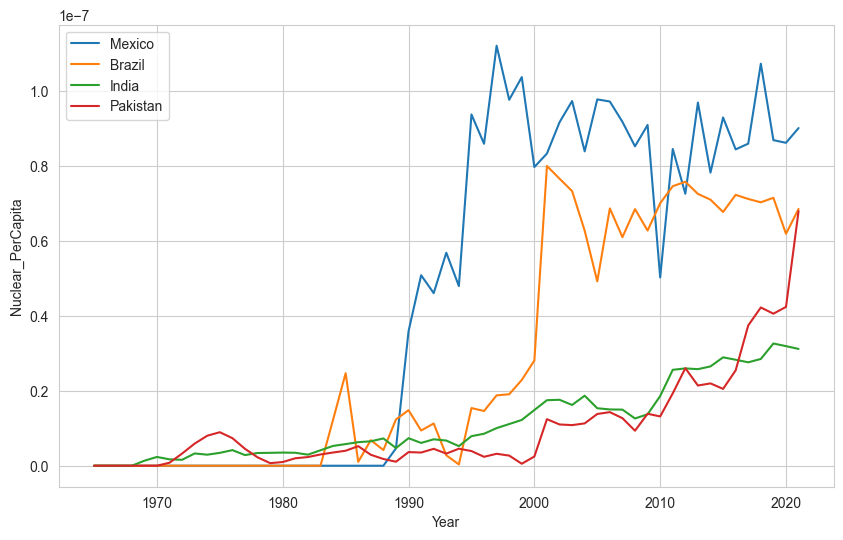

In [22]:
fig,ax = plt.subplots(figsize=(10,6))
ax=sns.lineplot(data=dfMex, x=dfMex.index, y=dfMex.Nuclear_PerCapita, label='Mexico')
ax=sns.lineplot(data=dfBra, x=dfBra.index, y=dfBra.Nuclear_PerCapita, label='Brazil')
ax=sns.lineplot(data=dfIn, x=dfIn.index, y=dfIn.Nuclear_PerCapita, label='India')
ax=sns.lineplot(data=dfPak, x=dfPak.index, y=dfPak.Nuclear_PerCapita, label='Pakistan')

**Hallazgo**
- De igual forma para los países del gráfico se observa un crecimiento en la generación de energía nuclear, siendo esta menos continua comparada con los países del gráfico anterior, esto se le puede atribuir principalmente a la falta de infraaestructura para llevar a cabo dicha generación.